In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] =10000000000000000000000000.0
import cmocean

In [3]:
%cd /work/eay/MITgcm_data/Experiment24/
file1 = nc.Dataset('Salt.nc')
%cd /work/eay/MITgcm_data/Experiment27/
file2 = nc.Dataset('Salt.nc')
%cd /work/eay/MITgcm_data/Experiment28/
file3 = nc.Dataset('Salt.nc')
%cd /work/eay/MITgcm_data/Experiment31/
file4 = nc.Dataset('Salt2.nc')
%cd /work/eay/MITgcm_data/
NX = 600
NY = 1000
NZ = 120

xq = (file1.variables['X'][:])
yq = (file1.variables['Y'][:])
zl = (file1.variables['Z'][:])
Time = file1.variables['T'][:]
print(Time.shape)



/work2/eay/MITgcm_data/Experiment24
/work2/eay/MITgcm_data/Experiment27
/work2/eay/MITgcm_data/Experiment28
/work2/eay/MITgcm_data/Experiment31
/work2/eay/MITgcm_data
(150,)


In [4]:
mask1 = file1.variables['S'][30,0,:,:]
mask2 = file2.variables['S'][30,0,:,:]
mask3 = file3.variables['S'][30,0,:,:]
mask4 = file4.variables['S'][30,0,:,:]
newmask = file4.variables['S'][0,:,:,:]



mask1.shape

(1000, 600)

In [5]:
#Computing freshwater layer

index=-1

Salt_1 = file1.variables['S'][index,:,:,:]; Salt_1[newmask==0]=np.nan
Sref = Salt_1*0.0+34.0
hf1=0.1*np.nansum((Sref-Salt_1)/34.0,axis=0)
hf1[(mask1==0)]=np.nan


Salt_2 = file2.variables['S'][index,:,:,:]; Salt_2[newmask==0]=np.nan
hf2=0.1*np.nansum((Sref-Salt_2)/34.0,axis=0)
hf2[(mask2==0)]=np.nan

Salt_3 = file3.variables['S'][index,:,:,:]; Salt_3[newmask==0]=np.nan
hf3=0.1*np.nansum((Sref-Salt_3)/34.0,axis=0)
hf3[(mask3==0)]=np.nan

Salt_4 = file4.variables['S'][index,:,:,:]; Salt_4[newmask==0]=np.nan
hf4=0.1*np.nansum((Sref-Salt_4)/34.0,axis=0)
hf4[(mask4==0)]=np.nan

print('done')

done


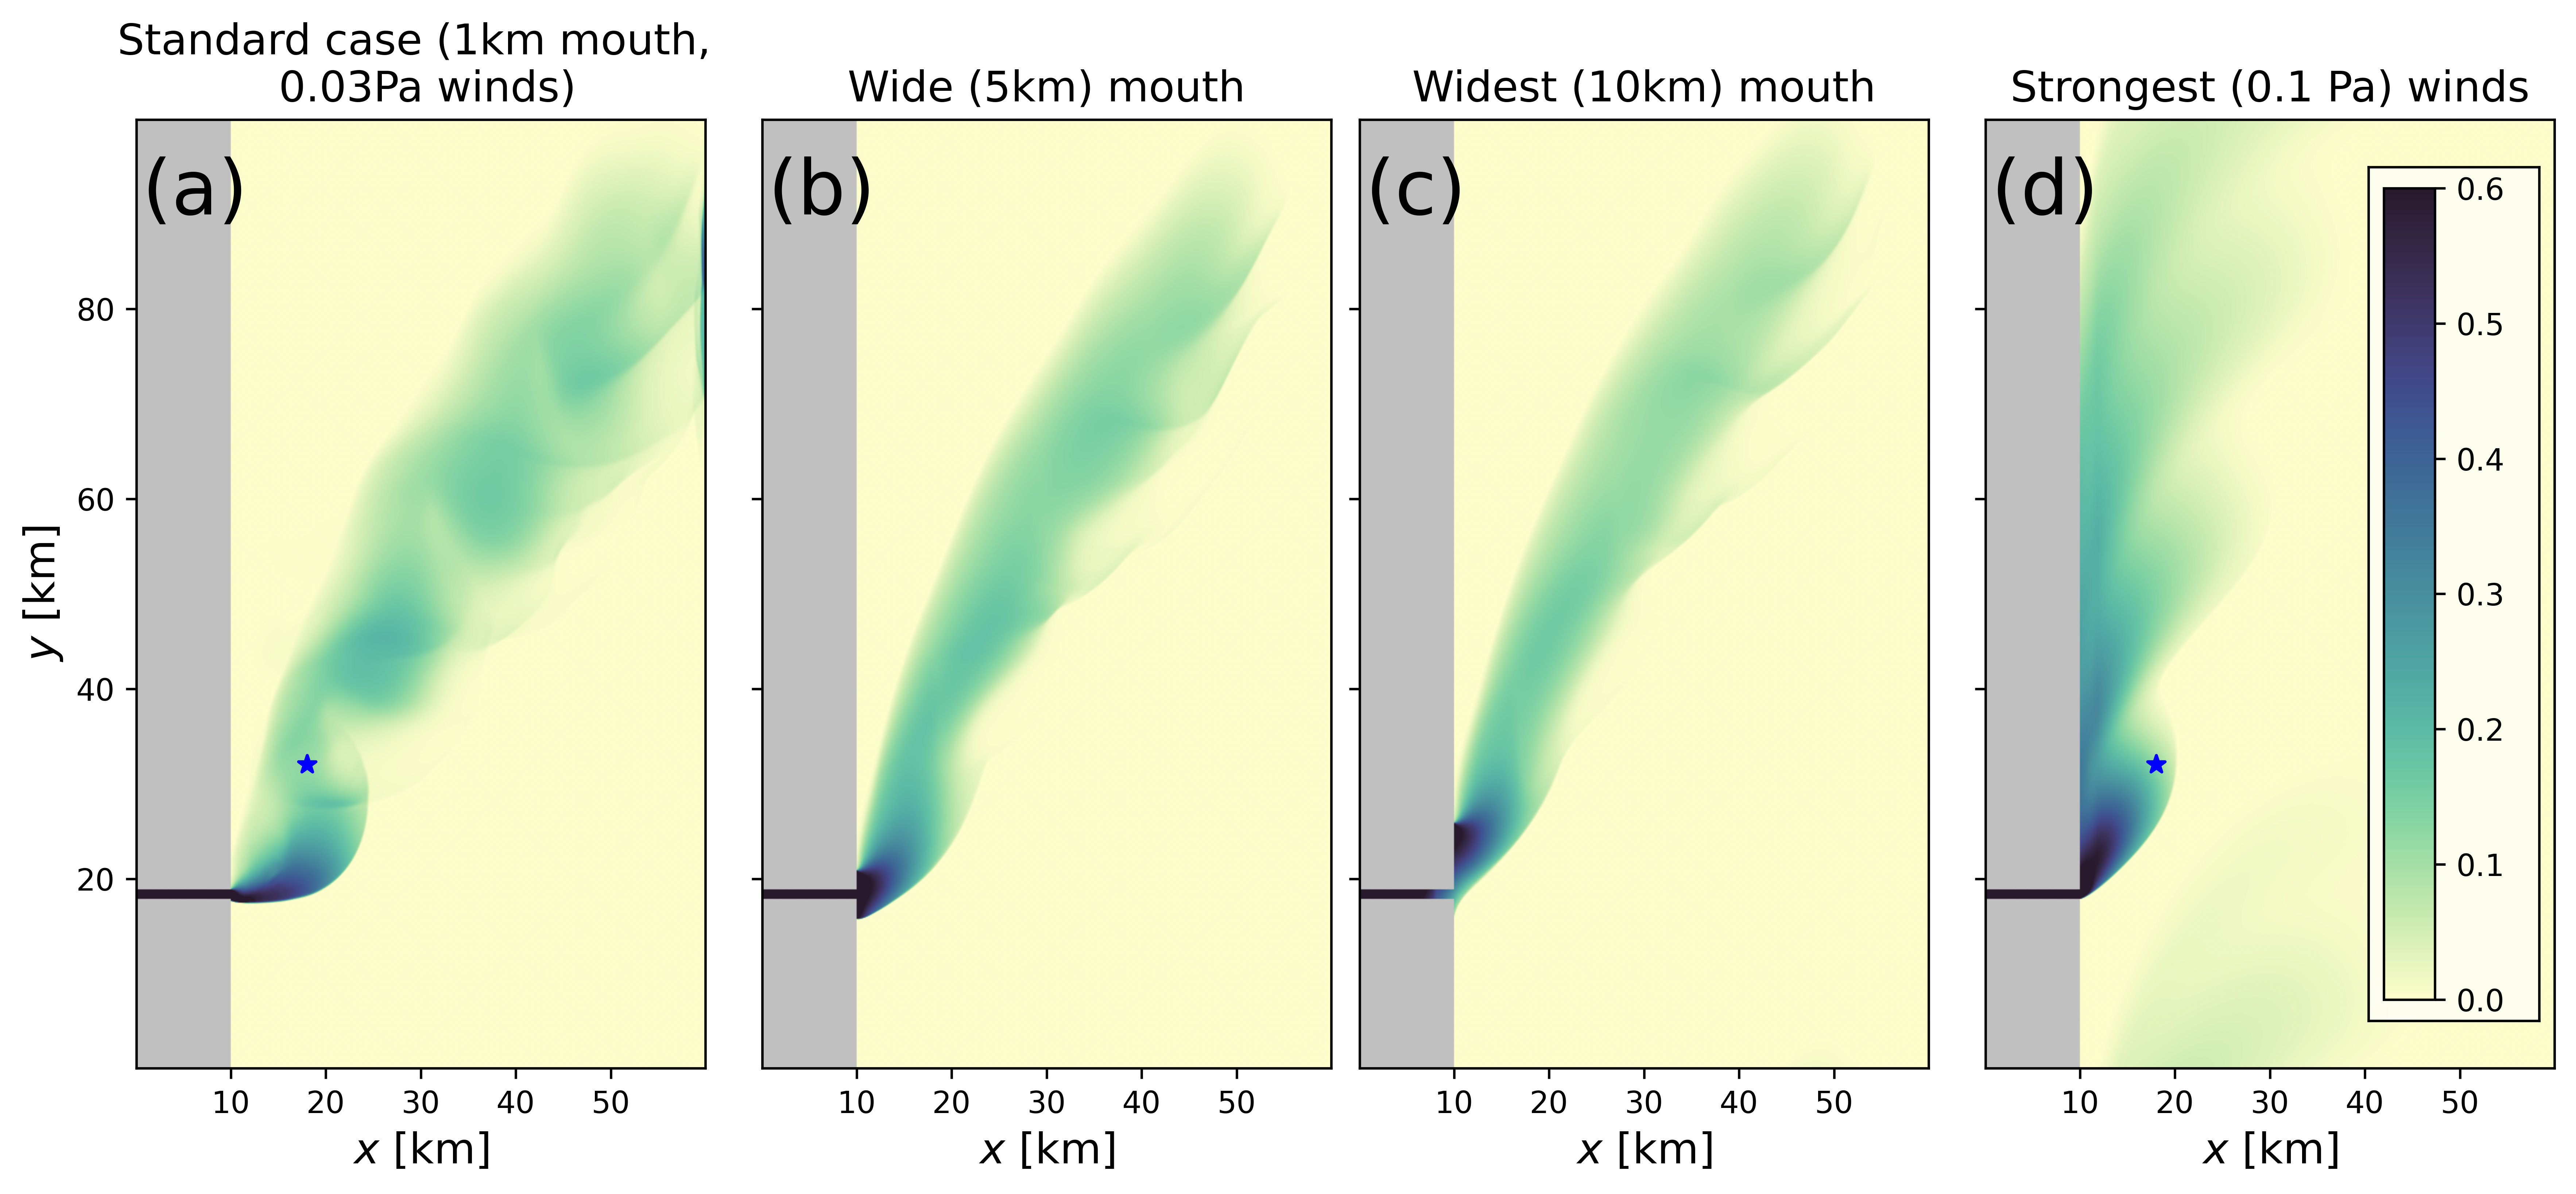

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(13, 10), dpi= 300, facecolor='w', edgecolor='k')
#main plots
ax1 = fig.add_axes([0.14,0.2,0.2,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.36,0.2,0.2,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax3 = fig.add_axes([0.57,0.2,0.2,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax4 = fig.add_axes([0.79,0.2,0.2,0.6])
current_cmap = plt.cm.get_cmap(cmocean.cm.deep).copy()
current_cmap.set_bad(color='silver')
#FIRST SUBPLOT
quad1 = ax1.pcolormesh(xq/1000,yq/1000,hf1,cmap=current_cmap,vmin=0,vmax=.6,shading='gouraud')
ax1.scatter(xq[180]/1000,yq[320]/1000,marker='*',color='b')

ax1.set_title('Standard case (1km mouth, \n 0.03Pa winds)', fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$y$ [km]',fontsize=14)
ax1.set_aspect('equal'); 
divider1 = make_axes_locatable(ax1); cax1 = divider1.new_vertical(size="5%", pad=0.7, pack_start=True)
ax1.text(0.01, 0.9, '(a)', transform=ax1.transAxes,fontsize=25)


quad2 = ax2.pcolormesh(xq/1000,yq/1000,hf2,cmap=current_cmap,vmin=0,vmax=.6,shading='gouraud')
ax2.set_title('Wide (5km) mouth', fontsize=14)
ax2.set_facecolor((0.92, 0.92, 0.92))
ax2.axes.set_yticklabels([])
ax2.set_xlabel('$x$ [km]',fontsize=14)
ax2.set_aspect('equal');
divider2 = make_axes_locatable(ax2); cax2 = divider2.new_vertical(size="5%", pad=0.7, pack_start=True)
ax2.text(0.01, 0.9, '(b)',transform=ax2.transAxes,fontsize=25)

quad3 = ax3.pcolormesh(xq/1000,yq/1000,hf3,cmap=current_cmap,vmin=0,vmax=.6,shading='gouraud')
ax3.set_title('Widest (10km) mouth', fontsize=14)
ax3.set_facecolor((0.92, 0.92, 0.92))
ax3.axes.set_yticklabels([])
ax3.set_xlabel('$x$ [km]',fontsize=14)
ax3.set_aspect('equal'); 
divider3 = make_axes_locatable(ax3); cax3 = divider3.new_vertical(size="5%", pad=0.7, pack_start=True)
ax3.text(0.01, 0.9, '(c)',transform=ax3.transAxes,fontsize=25)

quad4 = ax4.pcolormesh(xq/1000,yq/1000,hf4,cmap=current_cmap,vmin=0,vmax=.6,shading='gouraud')
ax4.set_title('Strongest (0.1 Pa) winds', fontsize=14)
ax4.set_facecolor((0.92, 0.92, 0.92))
ax4.axes.set_yticklabels([])
ax4.set_xlabel('$x$ [km]',fontsize=14)
ax4.set_aspect('equal'); 
divider4 = make_axes_locatable(ax4); cax4 = divider4.new_vertical(size="5%", pad=0.7, pack_start=True)
ax4.text(0.01, 0.9, '(d)',transform=ax4.transAxes,fontsize=25)

ax4.scatter(xq[180]/1000,yq[320]/1000,marker='*',color='b')

#Fancy colorbar!
cbbox = inset_axes(ax4, '30%', '90%', loc = 7)
cbbox.axes.set_yticklabels([])
cbbox.axes.set_xticklabels([])
cbbox.tick_params(left=False, right=False, bottom = False, top = False)
cbbox.set_facecolor([1,1,1,0.7])
cbaxes = inset_axes(cbbox, '30%', '95%', loc = 6)
fig.colorbar(quad4,cax=cbaxes) #make colorbar


#fig.savefig('Figure1.png', format='png', dpi=600)

In [20]:
%cd /work/eay/MITgcm_data/Experiment24/
fileU24 = nc.Dataset('U.nc')
fileV24 = nc.Dataset('V.nc')

U24 = fileU24.variables['U'][-25:,:,320,180]; 
V24 = fileV24.variables['V'][-25:,:,320,180]; 

%cd /work/eay/MITgcm_data/Experiment31/
fileU31 = nc.Dataset('U2.nc')
fileV31 = nc.Dataset('V2.nc')

U31 = fileU31.variables['U'][-25:,:,320,180]; 
V31 = fileV31.variables['V'][-25:,:,320,180]; 

%cd /work/eay/MITgcm_data/

/work2/eay/MITgcm_data/Experiment24
/work2/eay/MITgcm_data/Experiment31
/work2/eay/MITgcm_data


In [22]:
U24.shape

(25, 250)

Text(0.5, 0.98, 'Standard case, velocities over last tidal cycle')

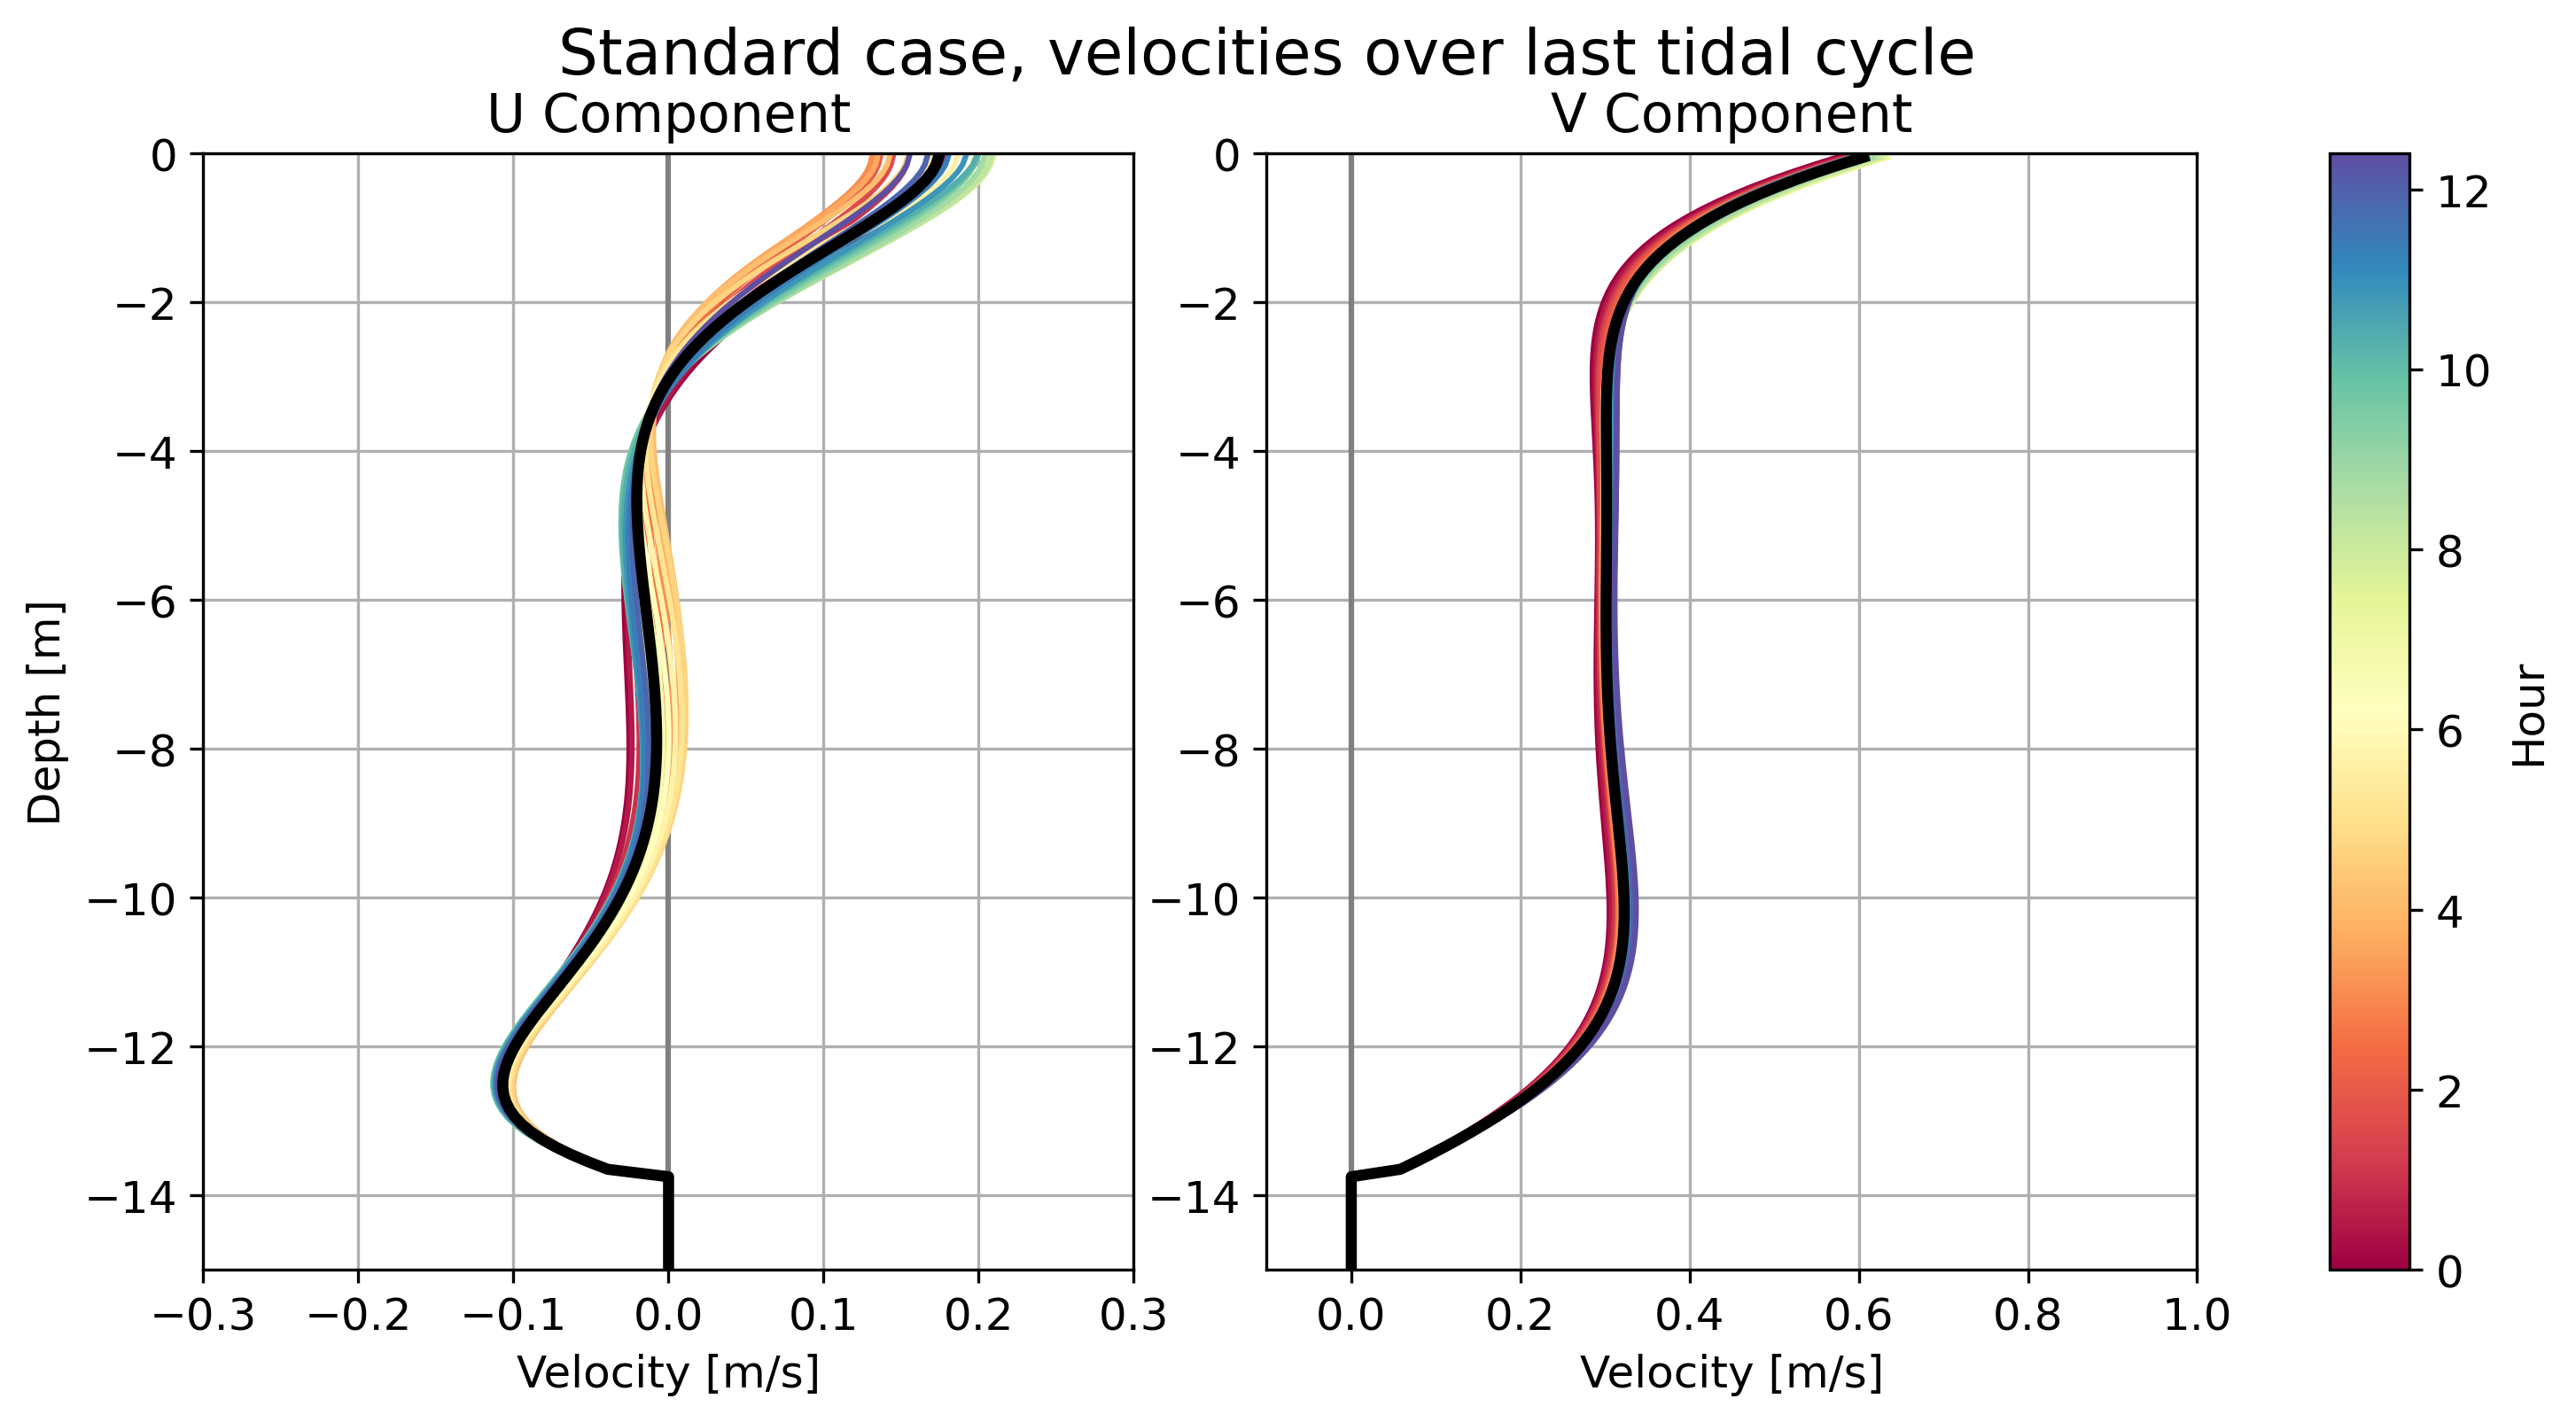

In [90]:
line_number = 25
plt.rc('font', size=12)

fig = plt.figure(figsize=(10, 6), dpi= 300, facecolor='w', edgecolor='k')
#main plots
ax1 = fig.add_axes([0.1,0.2,0.35,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.5,0.2,0.35,0.7])  
ax3 = fig.add_axes([0.9,0.2,0.03,0.7])  

color=iter(plt.cm.Spectral(np.linspace(0,1,line_number))) #rainbow
ax1.plot(U24[i,:]*0,zl,color=[.5,.5,.5])
ax2.plot(U24[i,:]*0,zl,color=[.5,.5,.5])
for i in range(line_number):
    c=next(color)
    ax1.plot(U24[i,:],zl,c=c)
    ax2.plot(V24[i,:],zl,c=c)
ax1.plot(U24[:,:].mean(axis=0),zl,color='k',linewidth=3)
ax2.plot(V24[:,:].mean(axis=0),zl,color='k',linewidth=3)

ax1.grid(); ax2.grid()
ax1.set_xlim(-.3, .3); ax1.set_ylim(-15, 0);
ax2.set_xlim(-.1, 1.); ax2.set_ylim(-15, 0);
ax1.set_title('U Component'); ax2.set_title('V Component'); 
ax1.set_xlabel('Velocity [m/s]'); ax2.set_xlabel('Velocity [m/s]');
ax1.set_ylabel('Depth [m]')

sm = plt.cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=0, vmax=12.4))
cbar=fig.colorbar(sm, cax=ax3, orientation='vertical')
cbar.set_label('Hour')

plt.suptitle("Standard case, velocities over last tidal cycle", fontsize=17)

#plt.legend(['BC Mode 1','BC Mode 2','BC Mode 3','BC Mode 4','BC Mode 5','BC Mode 6','BC Mode 7','BC Mode 8','BC Mode 9','BC Mode 10','BC Mode 11'])
#plt.plot([0, 0],[0, -4000],'--',color=[0,0,0])
#plt.xlim(-100, 100)
#plt.ylim(-4000, 0);
#plt.xlabel('Amplitude')
#plt.ylabel('Depth')
#plt.title('Isopycnal displacement modes')

Text(0.5, 0.98, 'Highest (0.1Pa) wind case, velocities over last tidal cycle')

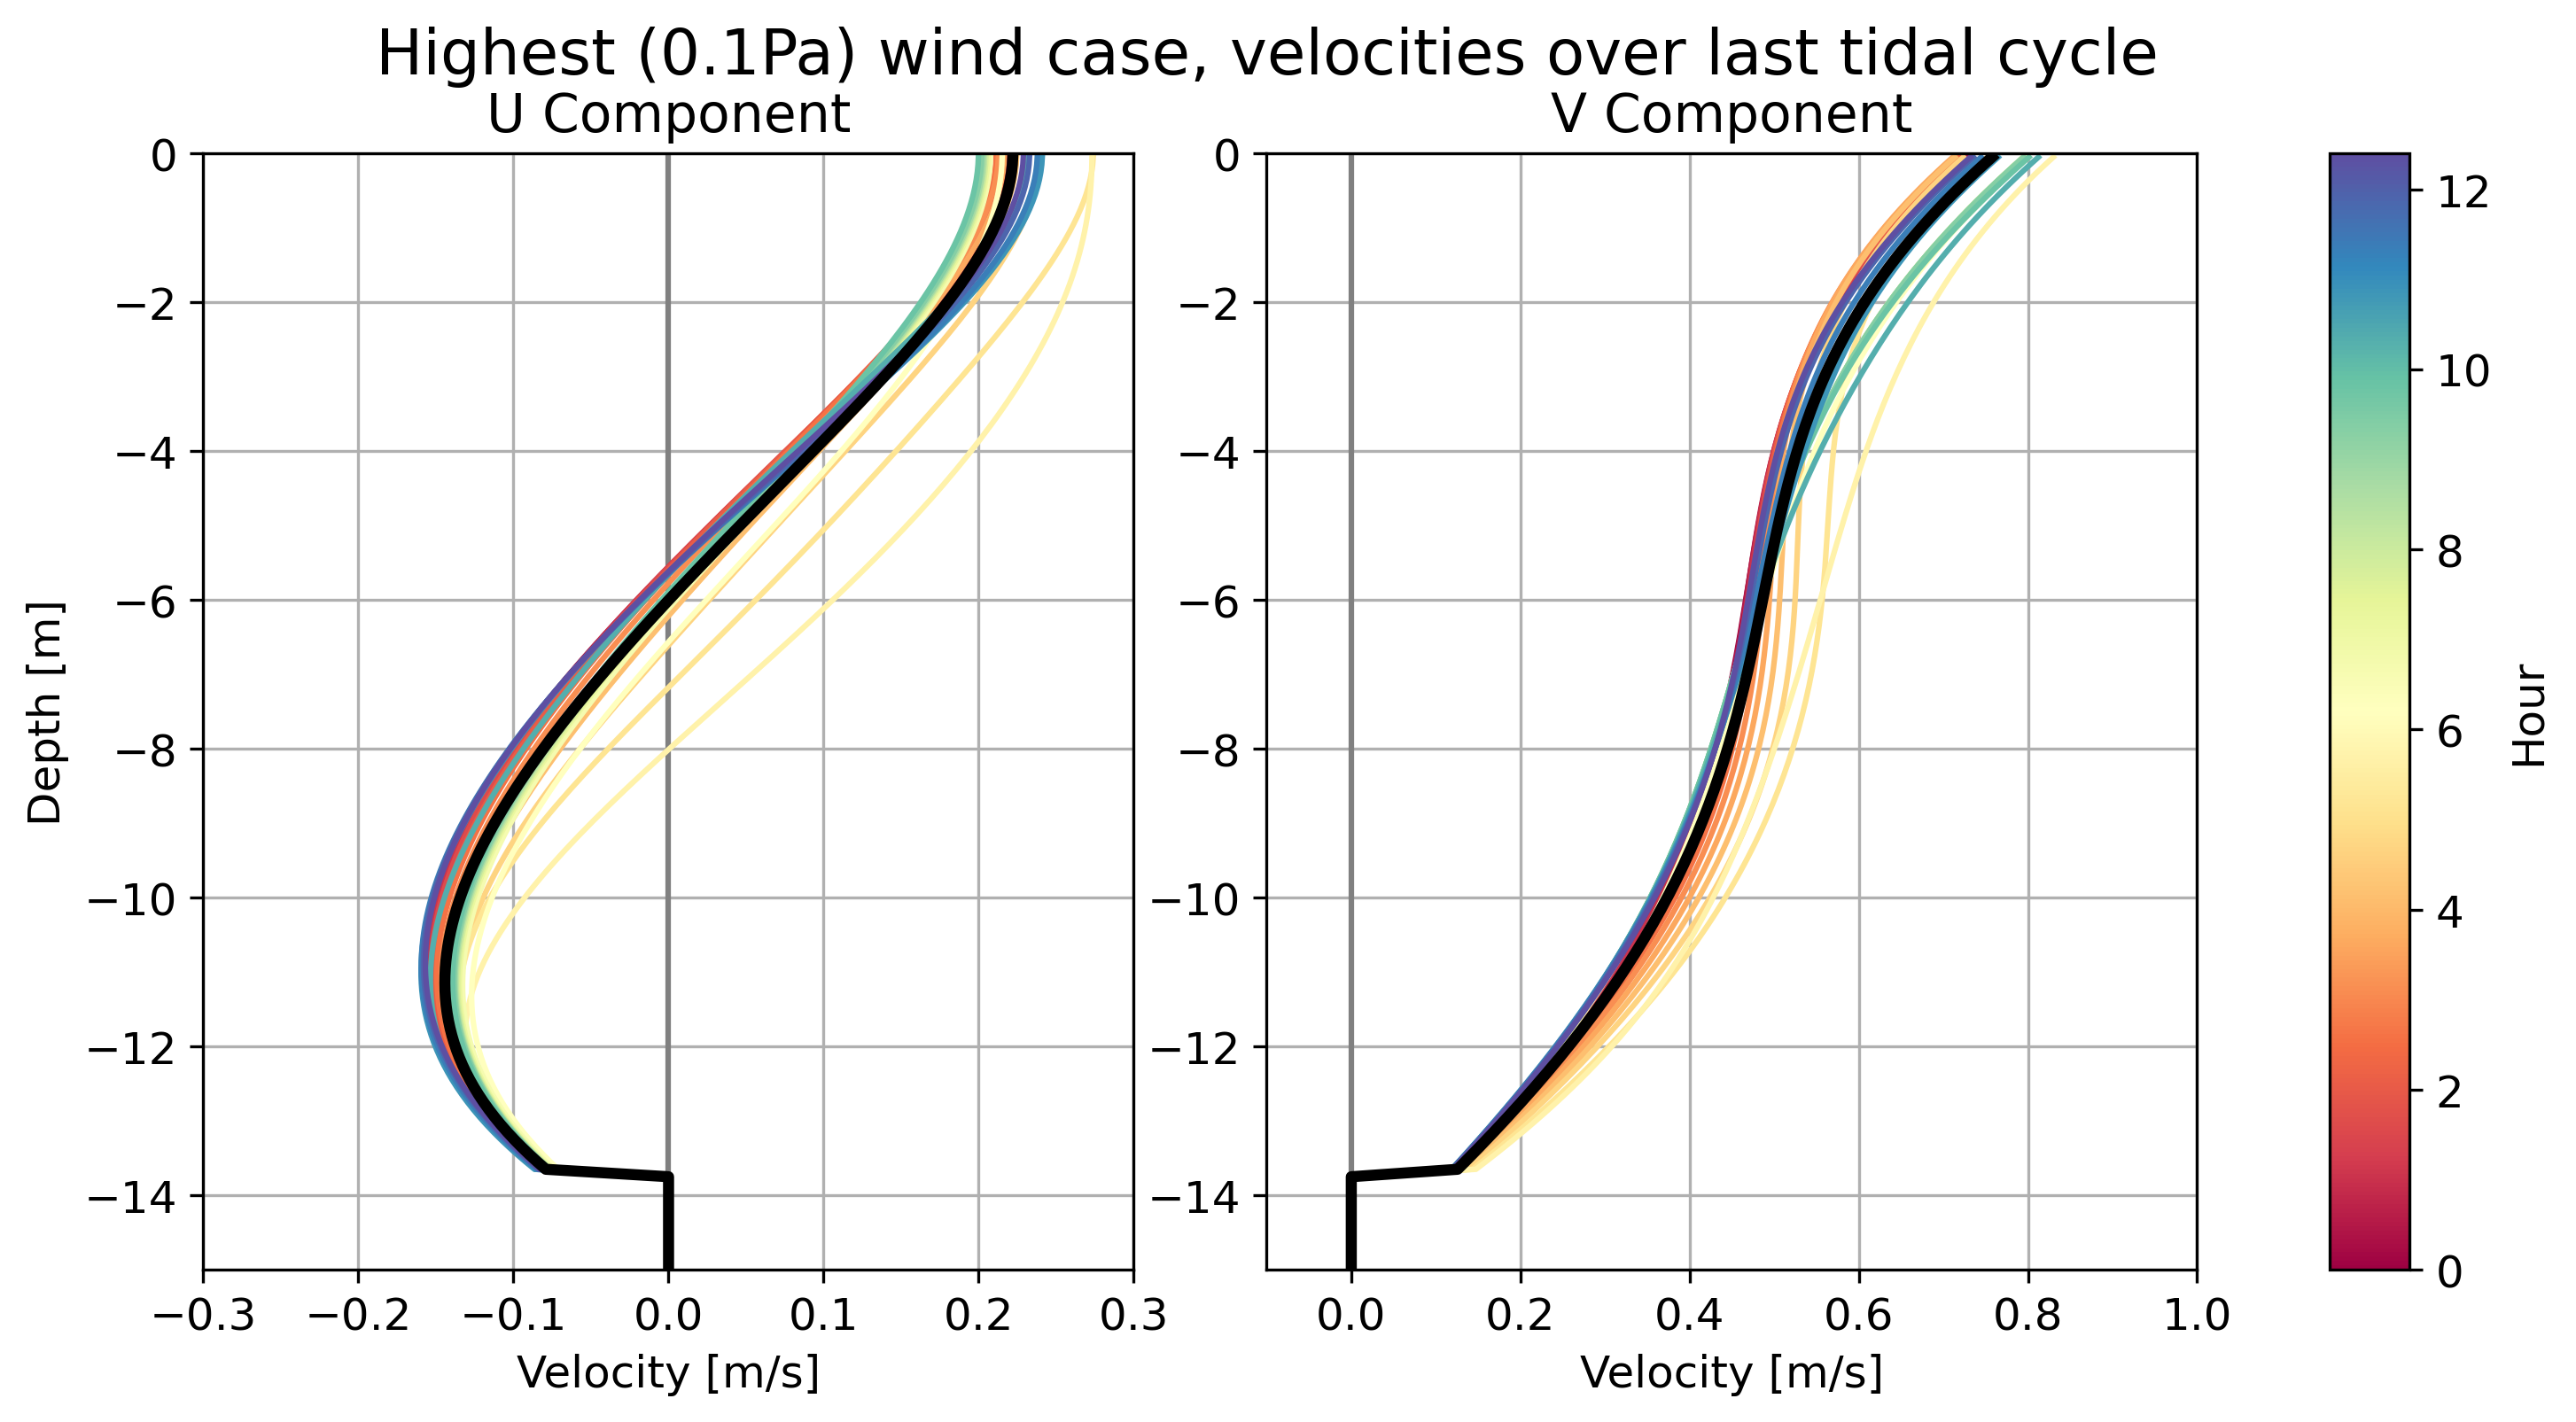

In [91]:
line_number = 25
plt.rc('font', size=12)

fig = plt.figure(figsize=(10, 6), dpi= 300, facecolor='w', edgecolor='k')
#main plots
ax1 = fig.add_axes([0.1,0.2,0.35,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.5,0.2,0.35,0.7])  
ax3 = fig.add_axes([0.9,0.2,0.03,0.7])  

color=iter(plt.cm.Spectral(np.linspace(0,1,line_number))) #rainbow
ax1.plot(U31[i,:]*0,zl,color=[.5,.5,.5])
ax2.plot(U31[i,:]*0,zl,color=[.5,.5,.5])
for i in range(line_number):
    c=next(color)
    ax1.plot(U31[i,:],zl,c=c)
    ax2.plot(V31[i,:],zl,c=c)
ax1.plot(U31[:,:].mean(axis=0),zl,color='k',linewidth=3)
ax2.plot(V31[:,:].mean(axis=0),zl,color='k',linewidth=3)

ax1.grid(); ax2.grid()
ax1.set_xlim(-.3, .3); ax1.set_ylim(-15, 0);
ax2.set_xlim(-.1, 1.); ax2.set_ylim(-15, 0);
ax1.set_title('U Component'); ax2.set_title('V Component'); 
ax1.set_xlabel('Velocity [m/s]'); ax2.set_xlabel('Velocity [m/s]');
ax1.set_ylabel('Depth [m]')

sm = plt.cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=0, vmax=12.4))
cbar=fig.colorbar(sm, cax=ax3, orientation='vertical')
cbar.set_label('Hour')

plt.suptitle("Highest (0.1Pa) wind case, velocities over last tidal cycle", fontsize=17)

#plt.legend(['BC Mode 1','BC Mode 2','BC Mode 3','BC Mode 4','BC Mode 5','BC Mode 6','BC Mode 7','BC Mode 8','BC Mode 9','BC Mode 10','BC Mode 11'])
#plt.plot([0, 0],[0, -4000],'--',color=[0,0,0])
#plt.xlim(-100, 100)
#plt.ylim(-4000, 0);
#plt.xlabel('Amplitude')
#plt.ylabel('Depth')
#plt.title('Isopycnal displacement modes')